In [4]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
# ========= 1) Load Excel =========
excel_path = "tohoku_index_clean.xlsx"  # <-- put your file here (same folder) or a full path
df = pd.read_excel(excel_path)

In [7]:
# Basic cleaning / normalization
df.columns = [str(c).strip() for c in df.columns]
required = {"Year", "Area", "Type", "Index"}
missing = required - set(df.columns)
if missing:
    raise ValueError(f"Missing columns: {missing}. Found: {df.columns.tolist()}")

df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")
df["Index"] = pd.to_numeric(df["Index"], errors="coerce")
df["Type"] = df["Type"].astype(str).str.strip().str.title()  # normalize case

# Keep only valid types
df = df[df["Type"].isin({"Flowering", "Fruiting"})].dropna(subset=["Year", "Index", "Type"])


In [8]:
df

Year      Area       Type  Index
0    2004    Aomori  Flowering    1.1
1    2005    Aomori  Flowering    3.8
2    2006    Aomori  Flowering    0.5
3    2007    Aomori  Flowering    1.7
4    2008    Aomori  Flowering    2.4
..    ...       ...        ...    ...
215  2021  Yamagata   Fruiting    1.5
216  2022  Yamagata   Fruiting    3.1
217  2023  Yamagata   Fruiting    0.1
218  2024  Yamagata   Fruiting    2.9
219  2025  Yamagata   Fruiting    0.0

[220 rows x 4 columns]

In [10]:
# ========= 2) Plot line: mean Index by Year & Type =========
agg_year_type = (df.groupby(["Year", "Type"], as_index=False)
                   .agg(Index=("Index", "mean"))
                   .sort_values(["Type", "Year"]))


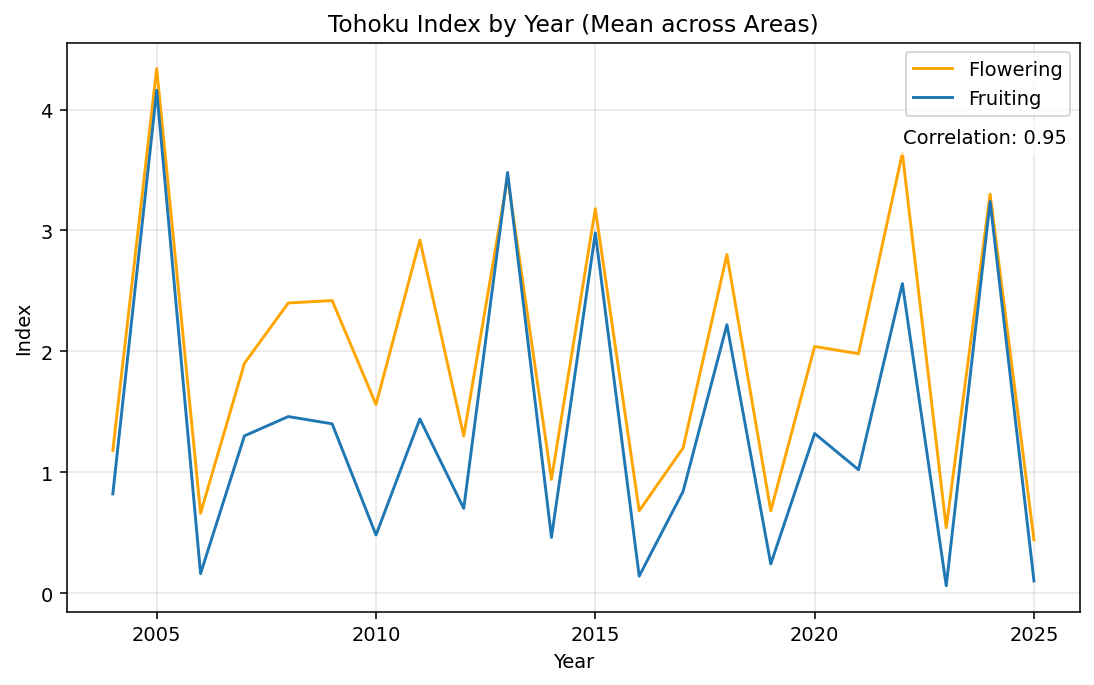

In [60]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5), dpi=140)

colors = {"Flowering": "#FFA500", "Fruiting": "#1f77b4"}

for t in ["Flowering", "Fruiting"]:
    sub = agg_year_type[agg_year_type["Type"] == t].sort_values("Year")
    if not sub.empty:
        ax.plot(sub["Year"].to_numpy(), sub["Index"].to_numpy(),
                label=t, color=colors[t])

# Annotation at top-left in axes coords
txt = f"Correlation: {corr_value:.2f}" if isinstance(corr_value, (int, float)) else "Correlation: N/A"
ax.text(0.825, 0.85, txt, fontsize=10, va="top", ha="left",
        transform=ax.transAxes, bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

ax.set_title("Tohoku Index by Year (Mean across Areas)")
ax.set_xlabel("Year")
ax.set_ylabel("Index")
ax.legend(title=None)
ax.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


In [20]:
# 1) Pivot so Flowering and Fruiting become columns
pivot_df = agg_year_type.pivot(index="Year", columns="Type", values="Index")
pivot_df.head()


Type  Flowering  Fruiting
Year                     
2004       1.18      0.82
2005       4.34      4.16
2006       0.66      0.16
2007       1.90      1.30
2008       2.40      1.46

In [21]:
# 2) Compute correlation between Flowering and Fruiting
correlation = pivot_df.corr()

print(correlation)

Type       Flowering  Fruiting
Type                          
Flowering   1.000000  0.950844
Fruiting    0.950844  1.000000


In [22]:
# Drop rows with missing values
paired = pivot_df.dropna(subset=["Flowering", "Fruiting"])

# Compute correlation
corr_value = paired["Flowering"].corr(paired["Fruiting"])
print("Correlation (Flowering vs Fruiting):", corr_value)


Correlation (Flowering vs Fruiting): 0.9508435758675227
